# Forecasting System

# Importing necessary libraries

In [81]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pandas as pd
import seaborn as sns
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

# Importing the dataset

In [25]:
df=pd.read_excel('/Users/israh/Downloads/Superstore.xls')

Studying more about the dataset

In [26]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [27]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [28]:
df.shape

(9994, 21)

In [29]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [30]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Preprocessing

Checking for null values

In [272]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Knowing the different categories of products available

In [32]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

Creating a dataset containing just the furniture products

In [33]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


Calculating the earliest/first order date

In [34]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

Calculating the latest order date

In [35]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

Dropping unwanted columns and keeping just the dates and sales info for analysis and forecasting

In [36]:
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


Preprocessing the Furniture data alone

Sort the dataset in ascending order of the order dates

In [37]:
furniture = furniture.sort_values('Order Date')
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [38]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [39]:
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


Set Order date as index since it's necessary for data analysis and forecasting

In [40]:
furniture = furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


Checking for frequency

In [41]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Resampling the data on monthly basis considering the mean for every month

In [53]:
r_furniture = furniture['Sales'].resample('MS').mean()

In [54]:
r_furniture

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [49]:
print(r_furniture['2017':])

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64


Similarly, performing the preprocessing for the office and technology supplies data

In [50]:
office= df.loc[df['Category'] == 'Office Supplies']
office

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [55]:
office['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [56]:
office['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [57]:
office.drop(cols,axis=1,inplace=True)
office

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900
...,...,...
9982,2016-09-22,35.560
9984,2015-05-17,31.500
9985,2015-05-17,55.600
9992,2017-02-26,29.600


In [58]:
office= office.sort_values('Order Date')
office

,Order Date,Sales
7980,2014-01-03,16.448
740,2014-01-04,272.736
739,2014-01-04,11.784
741,2014-01-04,3.540
1759,2014-01-05,19.536
...,...,...
5091,2017-12-30,3.024
1297,2017-12-30,20.720
908,2017-12-30,52.776
1296,2017-12-30,13.904


In [59]:
office=office.groupby('Order Date')['Sales'].sum().reset_index()
office

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430
...,...,...
1143,2017-12-26,814.594
1144,2017-12-27,13.248
1145,2017-12-28,1091.244
1146,2017-12-29,282.440


In [60]:
office = office.set_index('Order Date')
office

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430
...,...
2017-12-26,814.594
2017-12-27,13.248
2017-12-28,1091.244


In [61]:
office.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [62]:
r_office=office['Sales'].resample('MS').mean()
r_office

Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504188
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
2017-01-01     967.013136
2017-02-01     389.882737
2

In [63]:
print(r_office['2017':])

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64


In [64]:
technology = df.loc[df['Category'] == 'Technology']
technology

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
19,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
26,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,TEC-PH-10001305,Technology,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,United States,Los Angeles,...,90008,West,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208
9987,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-AC-10001539,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,79.990,1,0.0,28.7964
9988,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470


In [65]:
technology['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [66]:
technology['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [67]:
technology.drop(cols, axis=1, inplace = True)
technology

,Order Date,Sales
7,2014-06-09,907.152
11,2014-06-09,911.424
19,2014-08-27,213.480
26,2016-01-16,90.570
35,2016-12-08,1097.544
...,...,...
9983,2016-09-22,97.980
9986,2016-09-29,36.240
9987,2017-11-17,79.990
9988,2017-11-17,206.100


In [68]:
technology = technology.sort_values('Order Date')
technology

,Order Date,Sales
7478,2014-01-06,755.960
7477,2014-01-06,391.980
593,2014-01-09,31.200
765,2014-01-13,646.740
1913,2014-01-15,149.950
...,...,...
4924,2017-12-25,90.480
2569,2017-12-27,164.388
573,2017-12-28,14.850
1878,2017-12-29,302.376


In [69]:
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology

,Order Date,Sales
0,2014-01-06,1147.940
1,2014-01-09,31.200
2,2014-01-13,646.740
3,2014-01-15,149.950
4,2014-01-16,124.200
...,...,...
819,2017-12-25,401.208
820,2017-12-27,164.388
821,2017-12-28,14.850
822,2017-12-29,302.376


In [70]:
technology = technology.set_index('Order Date')
technology

,Sales
Order Date,
2014-01-06,1147.940
2014-01-09,31.200
2014-01-13,646.740
2014-01-15,149.950
2014-01-16,124.200
...,...
2017-12-25,401.208
2017-12-27,164.388
2017-12-28,14.850


In [71]:
technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [72]:
r_technology = technology['Sales'].resample('MS').mean()
r_technology

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
2014-06-01     766.905909
2014-07-01     533.608933
2014-08-01     708.435385
2014-09-01    2035.838133
2014-10-01     596.900900
2014-11-01    1208.056320
2014-12-01    1160.732889
2015-01-01     925.070800
2015-02-01     431.121250
2015-03-01     574.662333
2015-04-01     697.559500
2015-05-01     831.642857
2015-06-01     429.024400
2015-07-01     691.397733
2015-08-01    1108.902286
2015-09-01     950.856400
2015-10-01     594.716111
2015-11-01    1037.982652
2015-12-01    1619.637636
2016-01-01     374.671067
2016-02-01    1225.891400
2016-03-01    1135.150105
2016-04-01     875.911882
2016-05-01    1601.816167
2016-06-01    1023.259500
2016-07-01     829.312500
2016-08-01     483.620100
2016-09-01    1144.170300
2016-10-01    1970.835875
2016-11-01    1085.642360
2016-12-01     970.554870
2017-01-01    1195.218071
2017-02-01     430.501714
2

In [73]:
print(r_technology['2017':])

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64


# Plotting the sales data for each category

<AxesSubplot:xlabel='Order Date'>

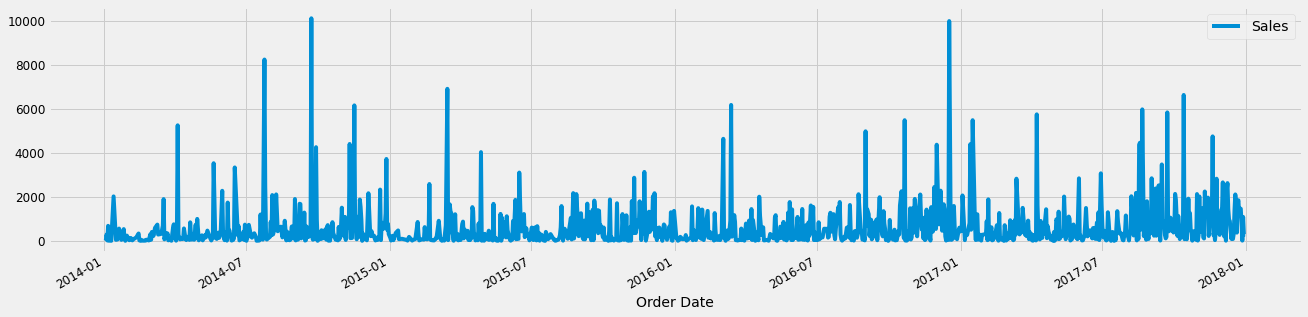

In [74]:
office.plot(figsize=(20,5))

<AxesSubplot:xlabel='Order Date'>

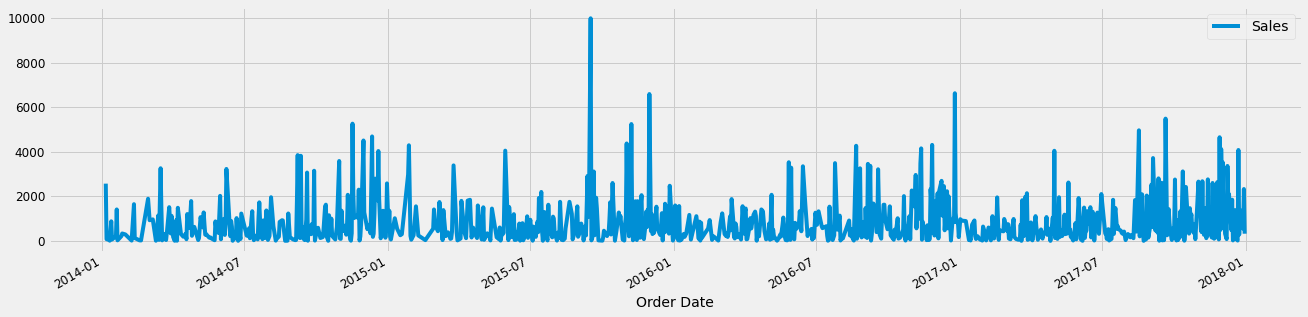

In [75]:
furniture.plot(figsize=(20,5))

<AxesSubplot:xlabel='Order Date'>

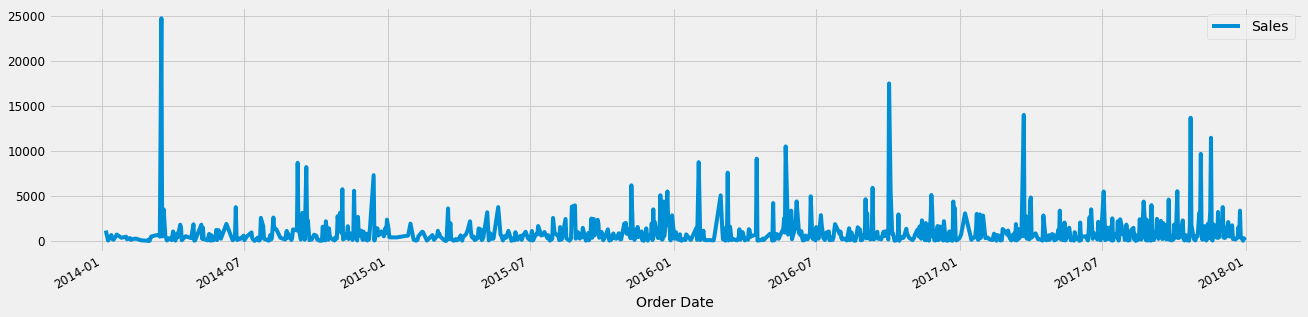

In [76]:
technology.plot(figsize=(20,5))

# Plotting the resampled monthly sales data

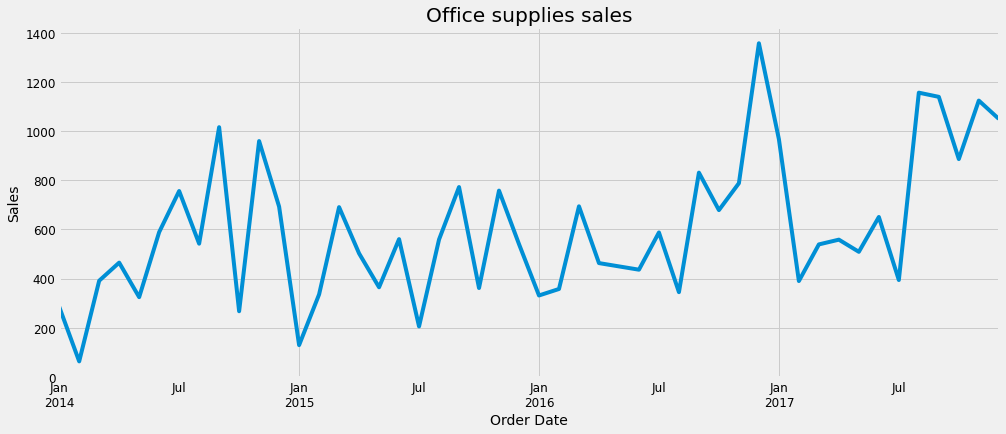

In [77]:
r_office.plot(figsize=(15,6))
plt.title("Office supplies sales")
plt.ylabel("Sales")
plt.show()

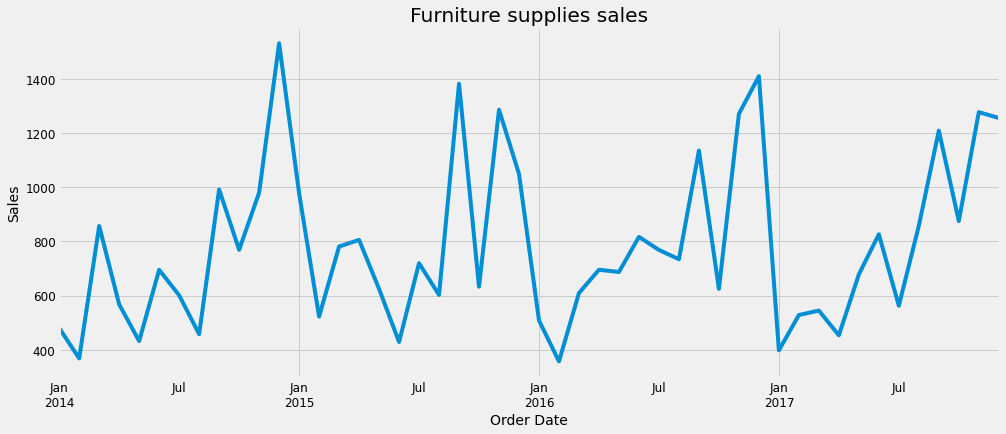

In [78]:
r_furniture.plot(figsize=(15,6))
plt.title("Furniture supplies sales")
plt.ylabel("Sales")
plt.show()

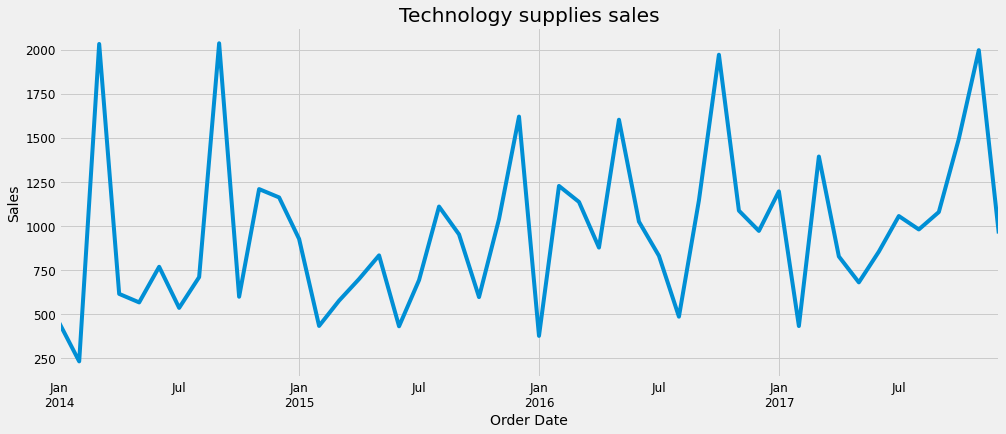

In [79]:
r_technology.plot(figsize=(15,6))
plt.title("Technology supplies sales")
plt.ylabel("Sales")
plt.show()

# Boxplotting

Text(0.5, 1.0, 'Box Plot on furniture sales')

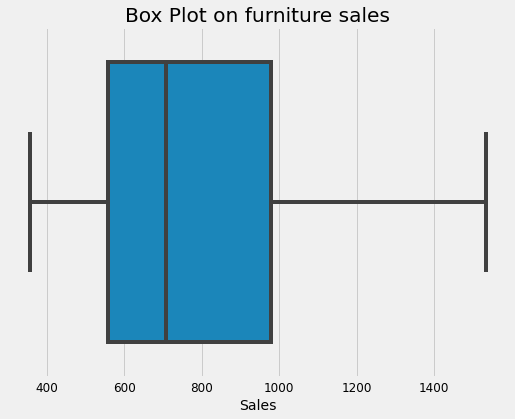

In [87]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(r_furniture).set_title('Box Plot on furniture sales')

Text(0.5, 1.0, 'Box Plot office supply sales')

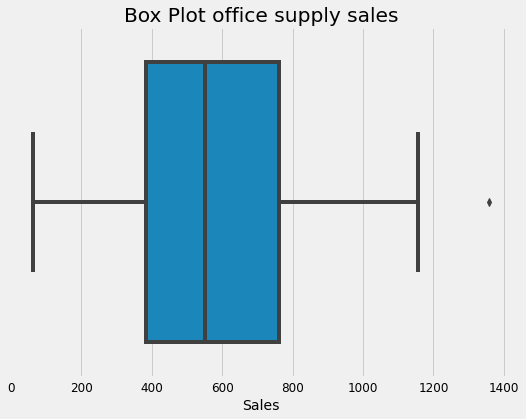

In [89]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(r_office).set_title('Box Plot office supply sales')

Text(0.5, 1.0, 'Box Plot Technology supply sales')

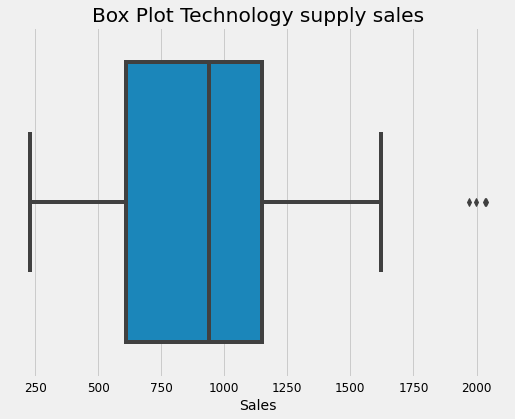

In [90]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(r_technology).set_title('Box Plot Technology supply sales')

# Performing ETS decomposition

Error Trend Seasonality decomposition

## Office 

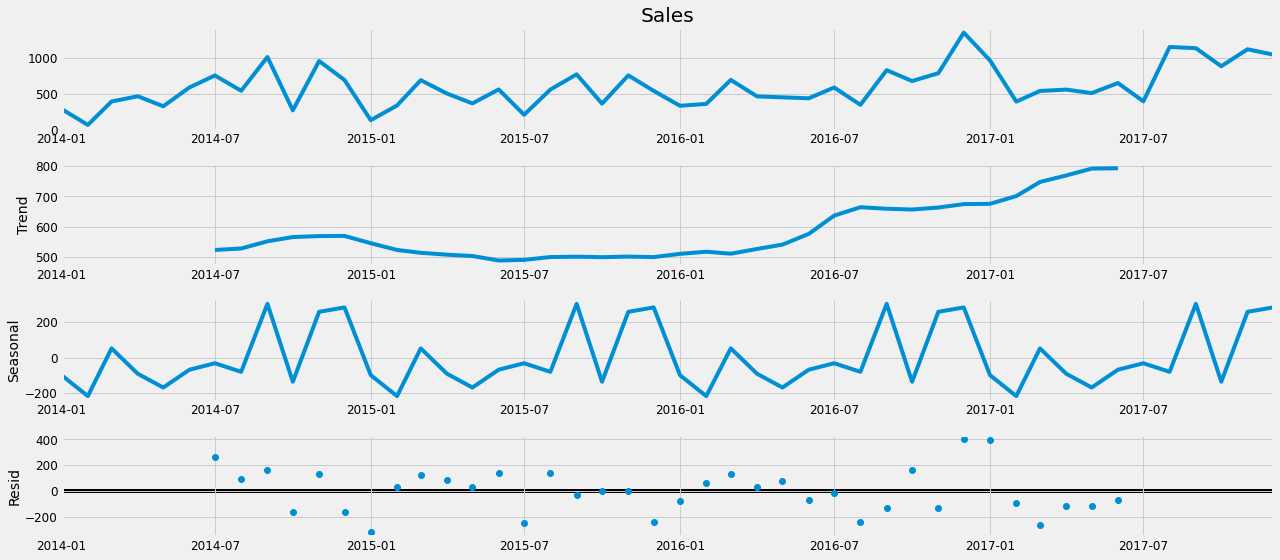

In [274]:
from pylab import rcParams
rcParams['figure.figsize']=18,8
decomposition_office = sm.tsa.seasonal_decompose(r_office,model='additive')
fig = decomposition_office.plot()
plt.show()

<AxesSubplot:xlabel='Order Date'>

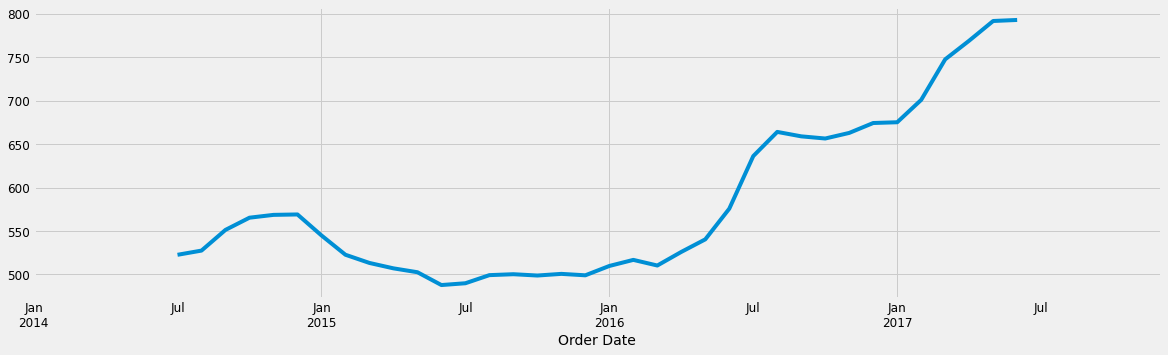

In [93]:
decomposition_office.trend.plot(figsize=(18,5))

<AxesSubplot:xlabel='Order Date'>

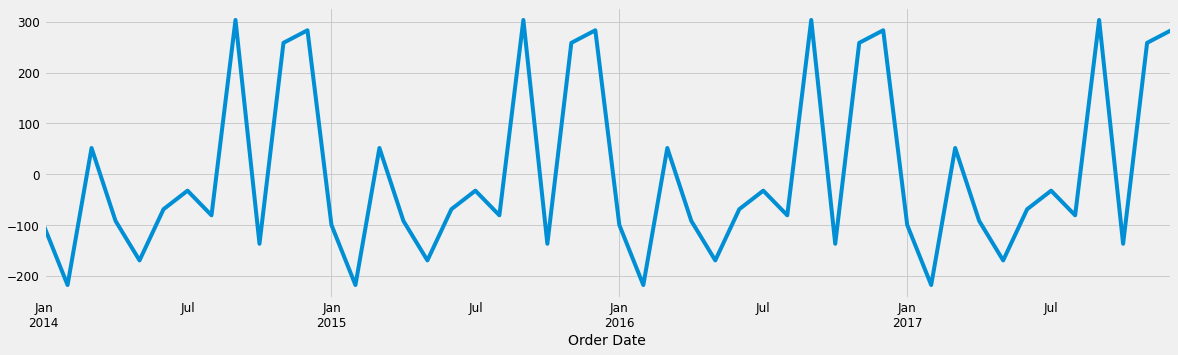

In [94]:
decomposition_office.seasonal.plot(figsize=(18,5))

## Furniture

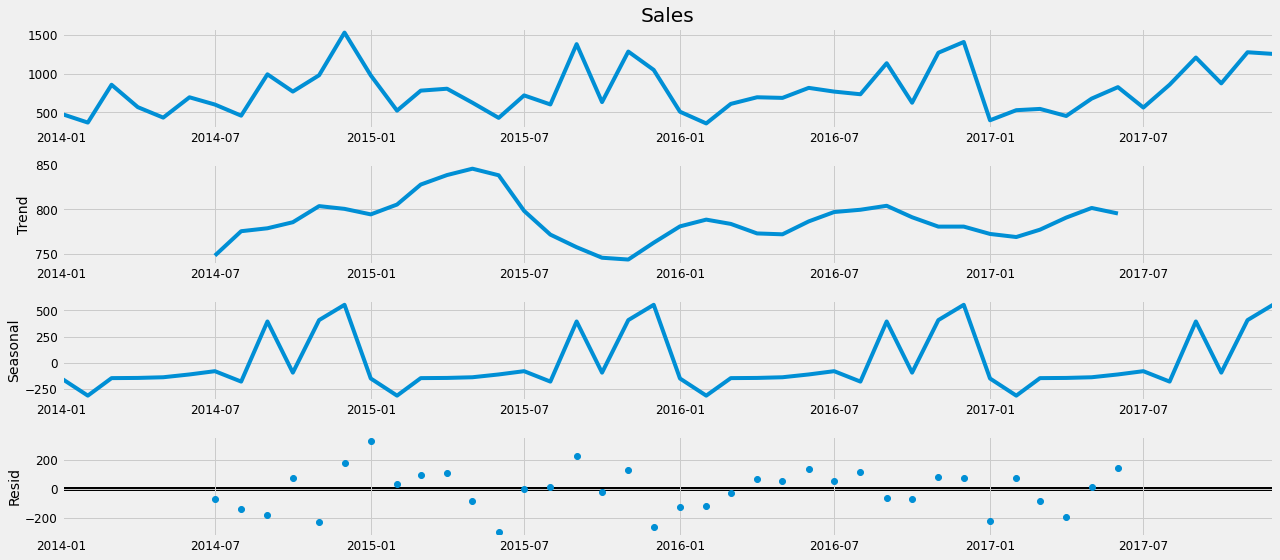

In [96]:
rcParams['figure.figsize']=18,8
decomposition_furniture = sm.tsa.seasonal_decompose(r_furniture,model='additive')
fig = decomposition_furniture.plot()
plt.show()

<AxesSubplot:xlabel='Order Date'>

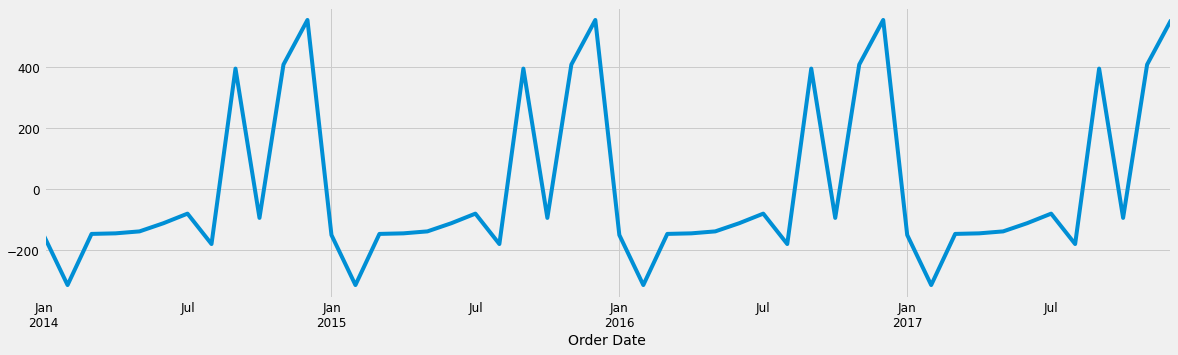

In [97]:
decomposition_furniture.seasonal.plot(figsize=(18,5))

<AxesSubplot:xlabel='Order Date'>

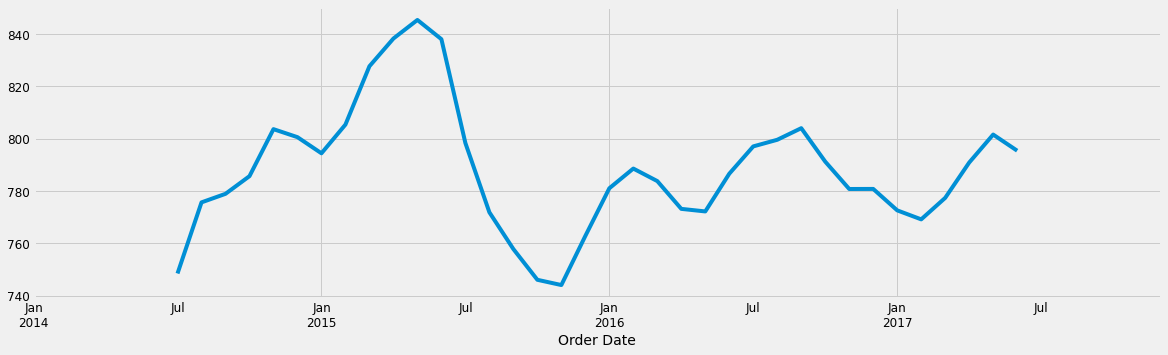

In [98]:
decomposition_furniture.trend.plot(figsize=(18,5))

## Technology

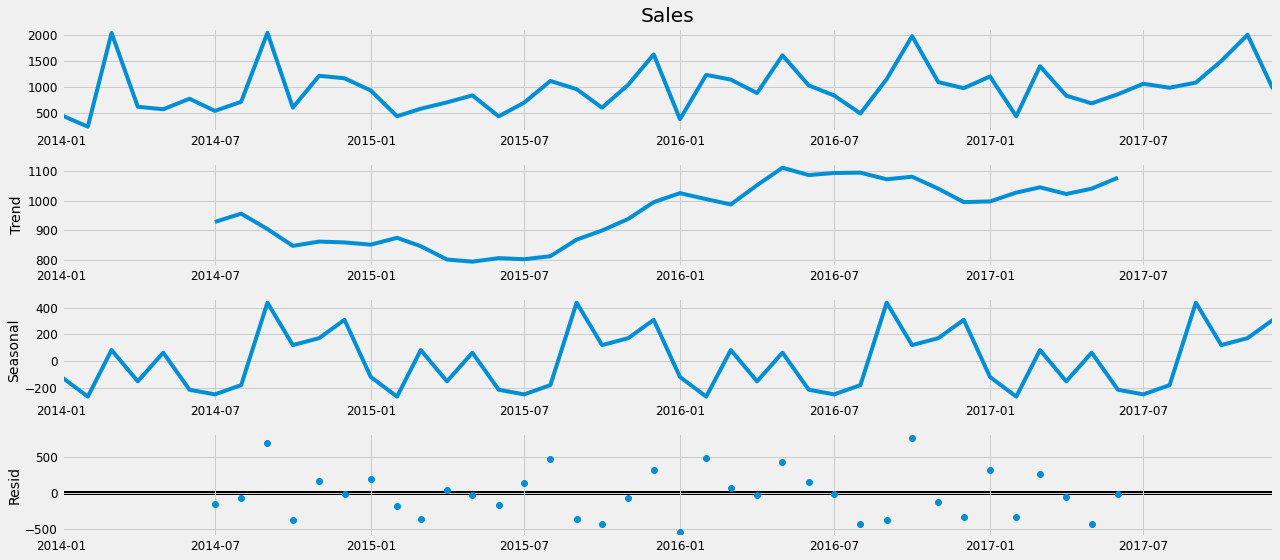

In [99]:
rcParams['figure.figsize']=18,8
decomposition_technology = sm.tsa.seasonal_decompose(r_technology,model='additive')
fig = decomposition_technology.plot()
plt.show()

<AxesSubplot:xlabel='Order Date'>

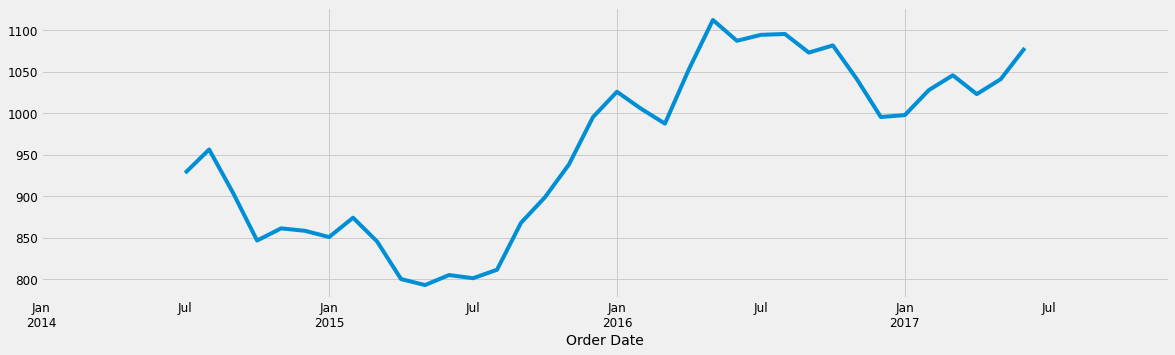

In [100]:
decomposition_technology.trend.plot(figsize=(18,5))

<AxesSubplot:xlabel='Order Date'>

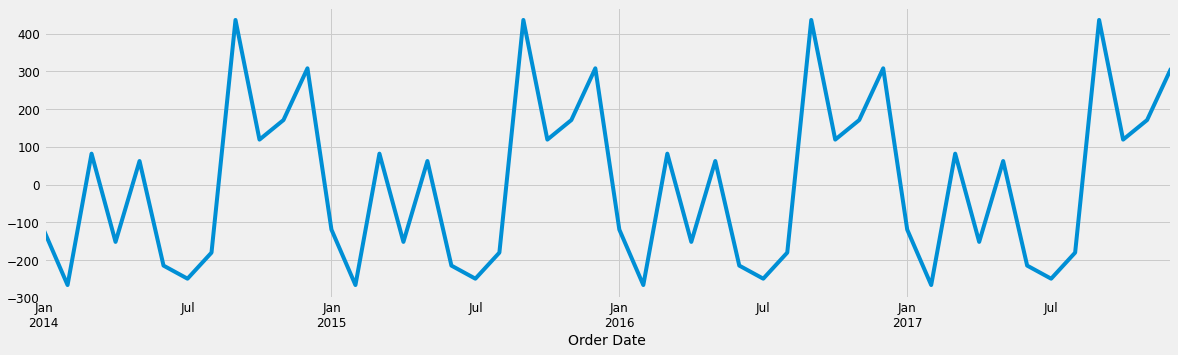

In [101]:
decomposition_technology.seasonal.plot(figsize=(18,5))

# Test for Stationarity

## Augmented Dickey-Fuller Test

In [102]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

### Furniture

In [104]:
adf_test(r_furniture)

Augmented Dickey-Fuller Test: 
ADF test statistic      -5.191070
p-value                  0.000009
# lags used             10.000000
# observations          37.000000
critical value (1%)     -3.620918
critical value (5%)     -2.943539
critical value (10%)    -2.610400
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Office

In [105]:
adf_test(r_office)

Augmented Dickey-Fuller Test: 
ADF test statistic      -4.664633
p-value                  0.000098
# lags used              0.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Technology

In [106]:
adf_test(r_technology)

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.187969e+00
p-value                 2.547334e-10
# lags used             0.000000e+00
# observations          4.700000e+01
critical value (1%)    -3.577848e+00
critical value (5%)    -2.925338e+00
critical value (10%)   -2.600774e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# Time Series Forecasting with ARIMA

## Splitting into train and test data sets

### Office

In [107]:
len(r_office)

48

In [108]:
48-12

36

In [109]:
train_office = r_office.iloc[:36]
test_office = r_office.iloc[36:]

In [110]:
train_office

Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504188
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
Freq: MS, Name: Sales, dtype: float64

In [111]:
test_office

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64

In [112]:
len(test_office)

12

Finding the best model

In [114]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 kB 2.0 MB/s eta 0:00:0000:0100:01


In [116]:
from pmdarima import auto_arima

In [118]:
model_office = auto_arima(r_office,m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=682.234, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=672.340, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=680.349, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=673.518, Time=0.02 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=671.706, Time=0.14 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=673.093, Time=0.35 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=679.178, Time=0.13 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=667.310, Time=0.34 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=667.427, Time=0.07 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=669.167, Time=0.44 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=669.30

In [119]:
model_office.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood                -326.927
Date:                             Fri, 07 Oct 2022   AIC                            661.855
Time:                                     16:19:16   BIC                            669.255
Sample:                                 01-01-2014   HQIC                           664.639
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8129      0.083     -9.802      0.000      -0.975      -0.650
ar.S.L12       0.2683      0.235      1.141      0.254      -0.192       0.729
ar.S.L24       0.3047      0.257      1.187      0.235      -0.198       0.808
sigma2      5.755e+04   1.13e+04      5.078      0.000    3.53e+04    7.98e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 2.47
Prob(Q):                              0.66   Prob(JB):                         0.29
Heteroskedasticity (H):               1.57   Skew:                             0.49
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
model_office

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

Training the model

In [121]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [122]:
model_office = SARIMAX(train_office,order=(0, 1, 1),seasonal_order=(2, 0, 0, 12),enforce_invertibility=False)

In [124]:
result_office = model_office.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84216D+00    |proj g|=  2.20407D-01

At iterate    5    f=  6.77203D+00    |proj g|=  1.01741D-03

At iterate   10    f=  6.77179D+00    |proj g|=  9.96834D-03

At iterate   15    f=  6.75372D+00    |proj g|=  7.72432D-02

At iterate   20    f=  6.73867D+00    |proj g|=  5.82841D-03

At iterate   25    f=  6.73712D+00    |proj g|=  4.95213D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   

 This problem is unconstrained.


In [125]:
result_office.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood                -242.536
Date:                             Fri, 07 Oct 2022   AIC                            493.072
Time:                                     16:22:40   BIC                            499.294
Sample:                                 01-01-2014   HQIC                           495.220
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9292      0.151     -6.143      0.000      -1.226      -0.633
ar.S.L12       0.3049      0.315      0.969      0.333      -0.312       0.922
ar.S.L24       0.3410      0.504      0.677      0.499      -0.647       1.329
sigma2      4.942e+04    1.6e+04      3.094      0.002    1.81e+04    8.07e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 7.89
Prob(Q):                              0.68   Prob(JB):                         0.02
Heteroskedasticity (H):               0.98   Skew:                             0.74
Prob(H) (two-sided):                  0.98   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Run model diagnostics to investigate any unusual behaviour

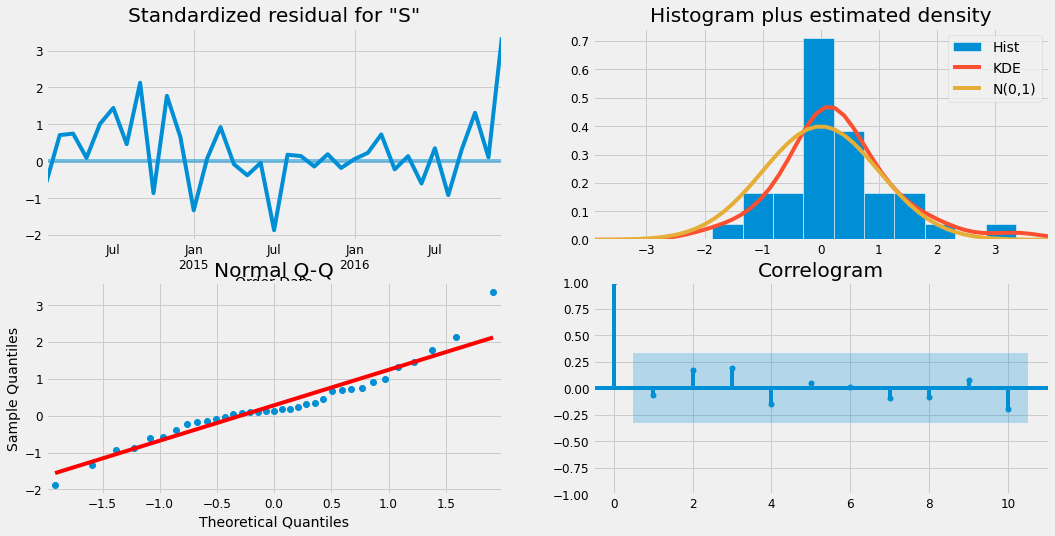

In [126]:
result_office.plot_diagnostics(figsize=(16,8))
plt.show()

### Predicting the values 

In [127]:
start = len(train_office)
end = len(train_office) + len(test_office) - 1

In [128]:
prediction_office = result_office.predict(start,end).rename('SARIMA model predictions')

In [129]:
prediction_office

2017-01-01    408.624496
2017-02-01    487.009637
2017-03-01    710.608494
2017-04-01    576.016160
2017-05-01    524.933143
2017-06-01    587.624908
2017-07-01    512.678165
2017-08-01    559.191629
2017-09-01    780.226163
2017-10-01    593.658240
2017-11-01    762.228766
2017-12-01    861.511255
Freq: MS, Name: SARIMA model predictions, dtype: float64

Text(0.5, 1.0, 'Office supplies sales')

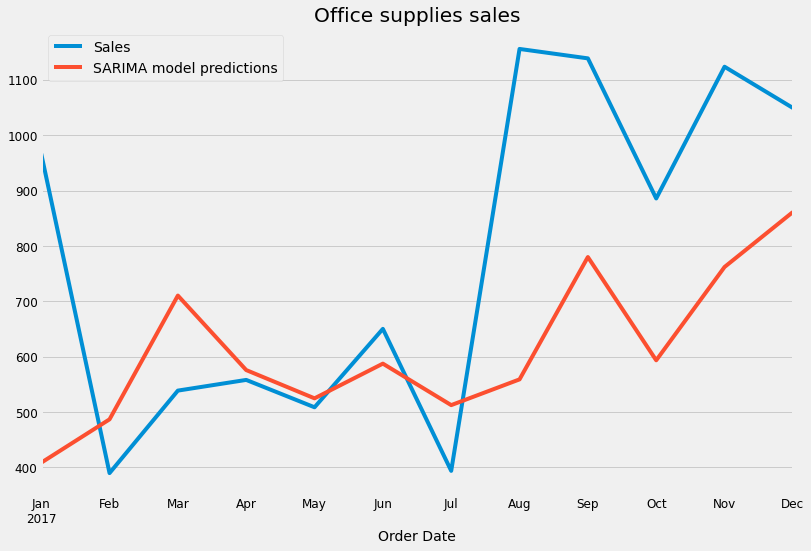

In [130]:
test_office.plot(figsize=(12,8),legend=True)
prediction_office.plot(legend=True)
plt.title("Office supplies sales")

### Evaluation of our model

In [131]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tools.eval_measures import rmse

In [132]:
mean_squared_error(test_office,prediction_office)

92188.29494426429

In [133]:
rmse(test_office,prediction_office)

303.6252541279534

In [134]:
test_office.mean()

780.1716465938612

In [135]:
#Comparing the mean value to the root mean square value we can say that the model had predicted in a good way

#### Forecasting the unknown future 

In [139]:
model_office_final = SARIMAX(r_office,order=(0, 1, 1),seasonal_order=(2, 0, 0, 12),enforce_invertibility=False)

In [140]:
result_office_final = model_office_final.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.96539D+00    |proj g|=  1.88783D-01

At iterate    5    f=  6.84066D+00    |proj g|=  7.00502D-03

At iterate   10    f=  6.84034D+00    |proj g|=  1.73517D-02

At iterate   15    f=  6.81936D+00    |proj g|=  2.13897D-01

At iterate   20    f=  6.81098D+00    |proj g|=  1.47338D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     23      1     0     0   3.589D-05   6.811D+00
  F =   6.8109848788017908     

CONVERG

 This problem is unconstrained.


In [142]:
forecast_office = result_office_final.predict(len(r_office),len(r_office)+11,typ='levels').rename('SARIMA forecast')

Text(0.5, 1.0, 'Office supplies sales')

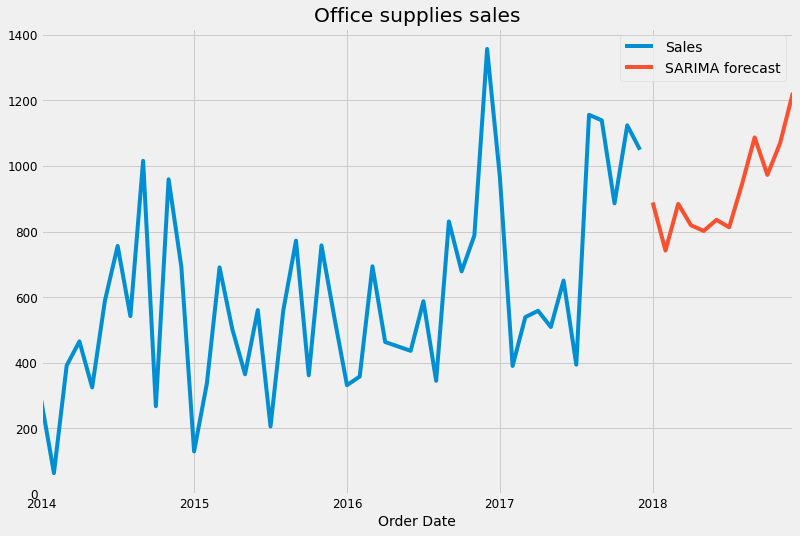

In [143]:
r_office.plot(legend=True,figsize=(12,8))
forecast_office.plot(legend=True)
plt.title("Office supplies sales")

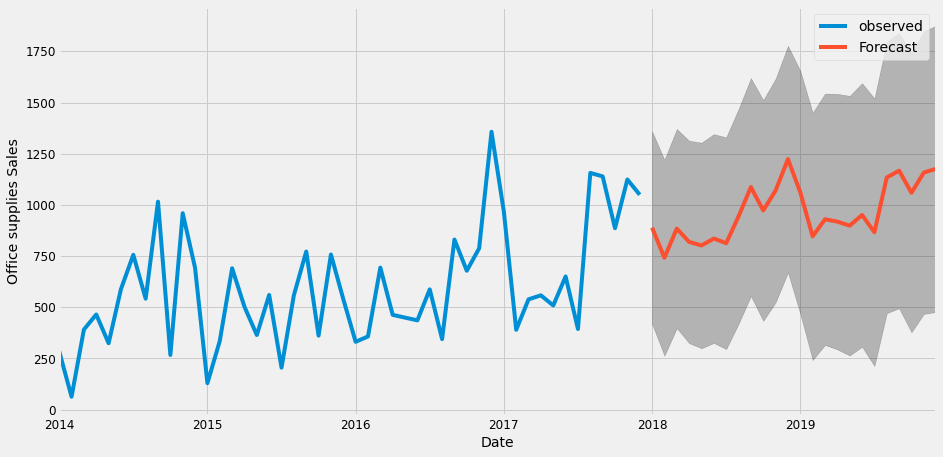

In [145]:
pred_office = result_office_final.get_forecast(steps=24)
pred_ci_office = pred_office.conf_int()
ax = r_office.plot(label='observed',figsize=(14,7))
pred_office.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci_office.index,
               pred_ci_office.iloc[:,0],
               pred_ci_office.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office supplies Sales')
plt.legend()
plt.show()

#### Perform the same for furniture and technology sales

### Furniture

In [146]:
len(r_furniture)

48

In [147]:
train_furniture = r_furniture.iloc[:36]
test_furniture = r_furniture.iloc[36:]

In [148]:
train_furniture

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [149]:
test_furniture

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [150]:
len(test_furniture)

12

In [151]:
model_furniture = auto_arima(r_furniture,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=494.536, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=497.083, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=494.685, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=495.371, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=496.071, Time=0.35 sec
 ARIMA(2,0,2)(2,1,1)[12] intercept   : AIC=501.732, Time=1.70 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=500.108, Time=1.35 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=495.005, Time=1.05 sec
 ARIMA(2,0,2)(2,1,0)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(2,0,2)(2,1,2)[12] intercept   : AIC=503.521, Time=1.46 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=498.528, Time=0.34 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, T

In [152]:
model_furniture.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -239.268
Date:                              Fri, 07 Oct 2022   AIC                            494.536
Time:                                      16:29:07   BIC                            507.204
Sample:                                  01-01-2014   HQIC                           498.957
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1938      1.680     -0.115      0.908      -3.487       3.100
ar.L1          1.7059      0.206      8.280      0.000       1.302       2.110
ar.L2         -0.8535      0.181     -4.715      0.000      -1.208      -0.499
ma.L1         -1.9396      1.981     -0.979      0.328      -5.822       1.943
ma.L2          0.9504      1.850      0.514      0.607      -2.675       4.576
ar.S.L12      -0.1212      0.564     -0.215      0.830      -1.226       0.984
ma.S.L12      -0.8576      3.163     -0.271      0.786      -7.056       5.341
sigma2       1.91e+04   7.04e+04      0.271      0.786   -1.19e+05    1.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.33   Prob(JB):                         0.80
Heteroskedasticity (H):               0.45   Skew:                             0.04
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
model_furniture

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True)

In [154]:
model_furniture = SARIMAX(train_furniture,order=(2, 0, 2),seasonal_order=(1, 1, 1, 12),enforce_invertibility=False)

In [155]:
result_furniture = model_furniture.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64382D+00    |proj g|=  2.37080D-01

At iterate    5    f=  4.57286D+00    |proj g|=  1.62808D-02

At iterate   10    f=  4.57236D+00    |proj g|=  2.28607D-03

At iterate   15    f=  4.57088D+00    |proj g|=  2.06659D-02

At iterate   20    f=  4.56590D+00    |proj g|=  3.10040D-02

At iterate   25    f=  4.55402D+00    |proj g|=  7.06815D-02

At iterate   30    f=  4.54865D+00    |proj g|=  1.44384D-02

At iterate   35    f=  4.54838D+00    |proj g|=  6.14351D-03

At iterate   40    f=  4.54402D+00    |proj g|=  4.85553D-02

At iterate   45    f=  4.48310D+00    |proj g|=  7.96614D-02

At iterate   50    f=  4.47853D+00    |proj g|=  1.09477D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

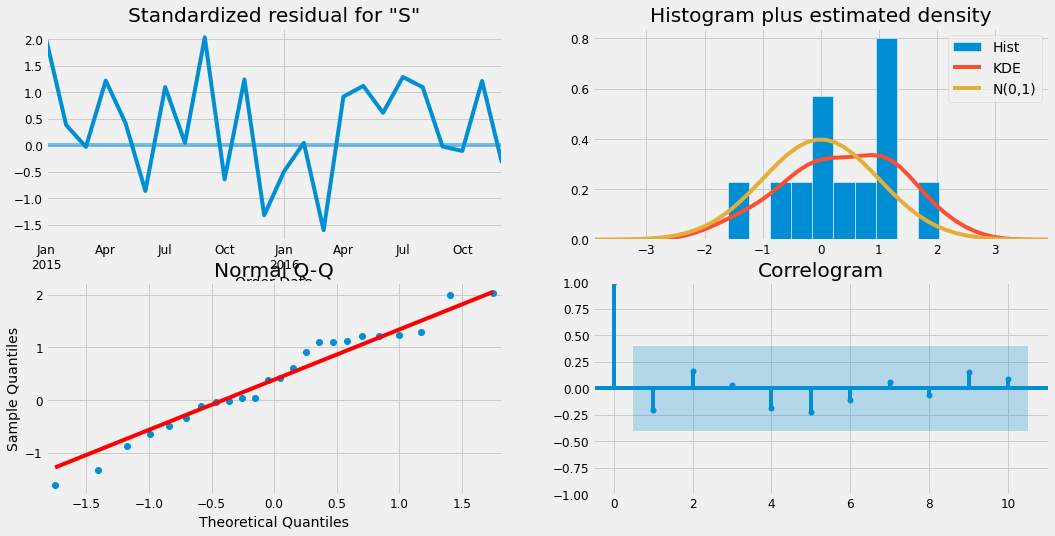

In [156]:
result_furniture.plot_diagnostics(figsize=(16,8))
plt.show()

In [157]:
start = len(train_furniture)
end = len(train_furniture) + len(test_furniture) - 1

In [158]:
prediction_furniture = result_furniture.predict(start,end).rename('SARIMA model')

In [159]:
prediction_furniture

2017-01-01     730.964740
2017-02-01     472.743610
2017-03-01     847.515654
2017-04-01     665.957391
2017-05-01     559.286098
2017-06-01     524.290147
2017-07-01     640.684039
2017-08-01     550.617485
2017-09-01    1223.323463
2017-10-01     673.806272
2017-11-01    1164.696995
2017-12-01    1214.162536
Freq: MS, Name: SARIMA model, dtype: float64

Text(0.5, 1.0, 'Furniture item sales')

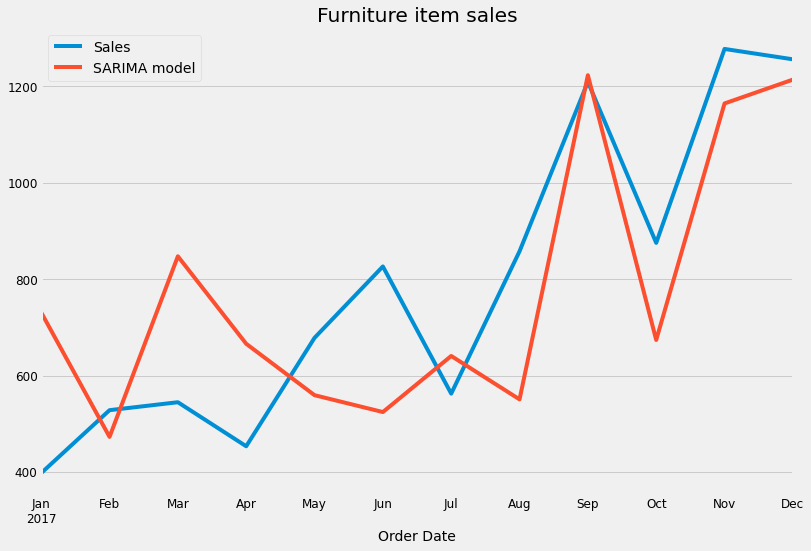

In [160]:
test_furniture.plot(figsize=(12,8),legend=True)
prediction_furniture.plot(legend=True)
plt.title("Furniture item sales")

In [161]:
#Evaluation of our model

In [162]:
mean_squared_error(test_furniture,prediction_furniture)

42710.1280052644

In [163]:
rmse(test_furniture,prediction_furniture)

206.66428817109258

In [164]:
test_furniture.mean()

788.9924321352877

In [165]:
model_furniture_final = SARIMAX(r_furniture,order=(2, 0, 2),seasonal_order=(1, 1, 1, 12),enforce_invertibility=False)

In [166]:
result_furniture_final = model_furniture_final.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.15727D+00    |proj g|=  2.89521D-01

At iterate    5    f=  5.07225D+00    |proj g|=  1.48146D-02

At iterate   10    f=  5.07118D+00    |proj g|=  1.65944D-03

At iterate   15    f=  5.05764D+00    |proj g|=  4.89562D-02

At iterate   20    f=  5.05359D+00    |proj g|=  3.21508D-02

At iterate   25    f=  5.04479D+00    |proj g|=  2.04190D-02


 This problem is unconstrained.



At iterate   30    f=  5.04404D+00    |proj g|=  1.80428D-02

At iterate   35    f=  5.04392D+00    |proj g|=  1.26300D-03

At iterate   40    f=  5.04391D+00    |proj g|=  3.73037D-03

At iterate   45    f=  5.04384D+00    |proj g|=  1.25899D-02

At iterate   50    f=  5.04328D+00    |proj g|=  1.39682D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   1.397D-02   5.043D+00
  F =   5.0432832151862854     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [168]:
forecast_furniture = result_furniture_final.predict(len(r_furniture),len(r_furniture)+11,typ='levels').rename('SARIMA forecast')

<AxesSubplot:xlabel='Order Date'>

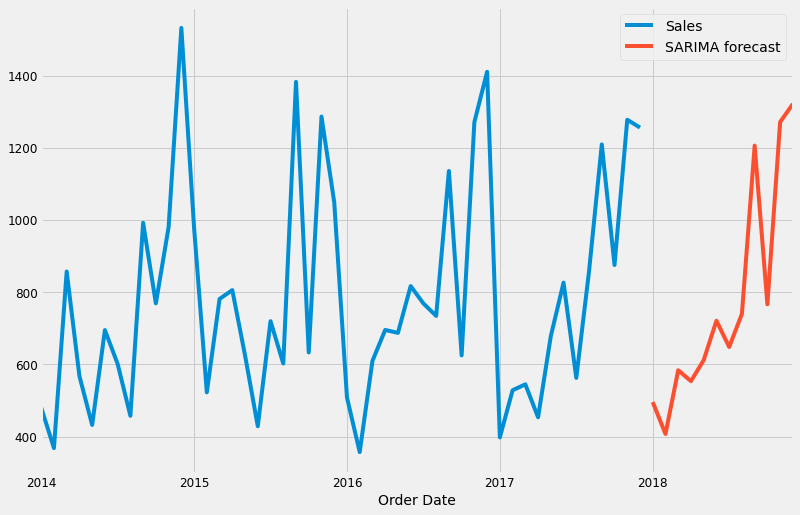

In [169]:
r_furniture.plot(legend=True,figsize=(12,8))
forecast_furniture.plot(legend=True)

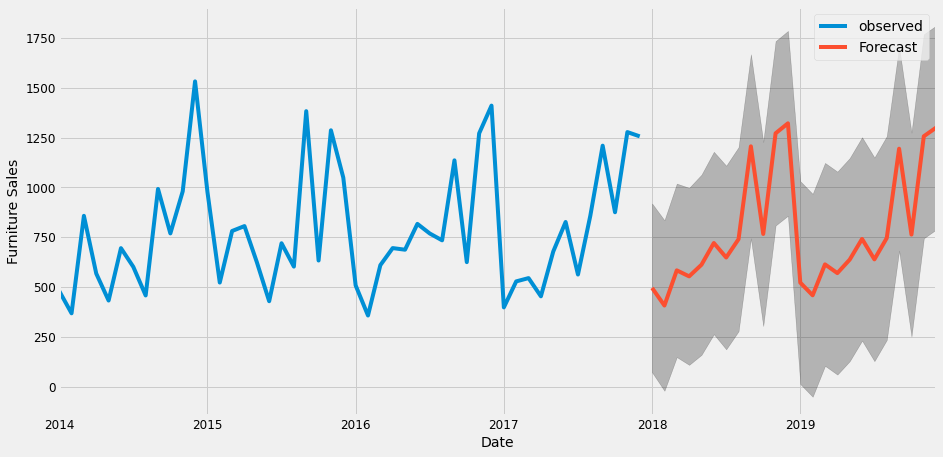

In [170]:
pred_furniture = result_furniture_final.get_forecast(steps=24)
pred_ci_furniture = pred_furniture.conf_int()
ax = r_furniture.plot(label='observed',figsize=(14,7))
pred_furniture.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci_furniture.index,
               pred_ci_furniture.iloc[:,0],
               pred_ci_furniture.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### Technology

In [171]:
len(r_technology)

48

In [172]:
train_technology = r_technology.iloc[:36]
test_technology = r_technology.iloc[36:]

In [173]:
train_technology

Order Date
2014-01-01     449.041429
2014-02-01     229.787143
2014-03-01    2031.948375
2014-04-01     613.028933
2014-05-01     564.698588
2014-06-01     766.905909
2014-07-01     533.608933
2014-08-01     708.435385
2014-09-01    2035.838133
2014-10-01     596.900900
2014-11-01    1208.056320
2014-12-01    1160.732889
2015-01-01     925.070800
2015-02-01     431.121250
2015-03-01     574.662333
2015-04-01     697.559500
2015-05-01     831.642857
2015-06-01     429.024400
2015-07-01     691.397733
2015-08-01    1108.902286
2015-09-01     950.856400
2015-10-01     594.716111
2015-11-01    1037.982652
2015-12-01    1619.637636
2016-01-01     374.671067
2016-02-01    1225.891400
2016-03-01    1135.150105
2016-04-01     875.911882
2016-05-01    1601.816167
2016-06-01    1023.259500
2016-07-01     829.312500
2016-08-01     483.620100
2016-09-01    1144.170300
2016-10-01    1970.835875
2016-11-01    1085.642360
2016-12-01     970.554870
Freq: MS, Name: Sales, dtype: float64

In [174]:
test_technology

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64

In [175]:
len(test_technology)

12

In [176]:
model_technology = auto_arima(r_technology,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=732.020, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=725.877, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=729.717, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=729.615, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=807.454, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=727.873, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=727.843, Time=0.01 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=729.843, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=727.740, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=727.697, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=729.641, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.468 seconds


In [177]:
model_technology.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:                        SARIMAX   Log Likelihood                -360.939
Date:                Fri, 07 Oct 2022   AIC                            725.877
Time:                        16:30:04   BIC                            729.620
Sample:                    01-01-2014   HQIC                           727.291
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    967.6149     77.667     12.458      0.000     815.390    1119.840
sigma2       1.99e+05   4.64e+04      4.292      0.000    1.08e+05     2.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 5.70
Prob(Q):                              0.70   Prob(JB):                         0.06
Heteroskedasticity (H):               0.69   Skew:                             0.84
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [178]:
model_technology

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [179]:
#That means our data have White noise .
#Time series that show no autocorrelation are called white noise.
#If a time series is white noise, it is a sequence of random numbers and cannot be predicted. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model.

In [180]:
model_technology = auto_arima(r_technology,allowmean=False,allowdrift=False,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=732.020, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=725.877, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=729.717, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=729.615, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=807.454, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=727.873, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=727.843, Time=0.01 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=729.843, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=727.740, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=727.697, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=729.641, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.451 seconds


In [181]:
model_technology = SARIMAX(train_technology,order=(0, 0, 0),seasonal_order=(0, 0, 0, 12),enforce_invertibility=False)

In [182]:
result_technology = model_technology.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.36296D+00    |proj g|=  3.55271D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.553D-10   8.363D+00
  F =   8.3629579243789607     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


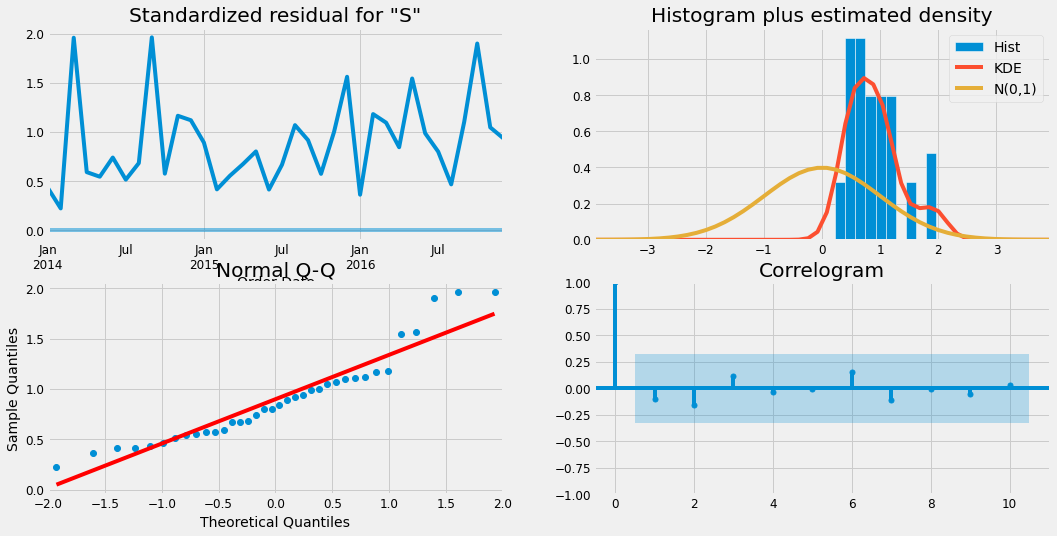

In [183]:
result_technology.plot_diagnostics(figsize=(16,8))
plt.show()

In [186]:
start = len(train_technology)
end = len(train_technology) + len(test_technology) - 1

In [187]:
prediction_technology = result_technology.predict(start,end).rename('SARIMA model')

In [188]:
prediction_technology

2017-01-01    0.0
2017-02-01    0.0
2017-03-01    0.0
2017-04-01    0.0
2017-05-01    0.0
2017-06-01    0.0
2017-07-01    0.0
2017-08-01    0.0
2017-09-01    0.0
2017-10-01    0.0
2017-11-01    0.0
2017-12-01    0.0
Freq: MS, Name: SARIMA model, dtype: float64

In [189]:
model_technology_final = SARIMAX(r_technology,order=(0, 0, 0),seasonal_order=(0, 0, 0, 12),enforce_invertibility=False)

In [190]:
result_technology_final = model_technology_final.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39015D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   8.390D+00
  F =   8.3901477871423005     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [191]:
forecast_technology = result_technology_final.predict(len(r_technology),len(r_technology)+11,typ='levels').rename('SARIMA forecast')

<AxesSubplot:xlabel='Order Date'>

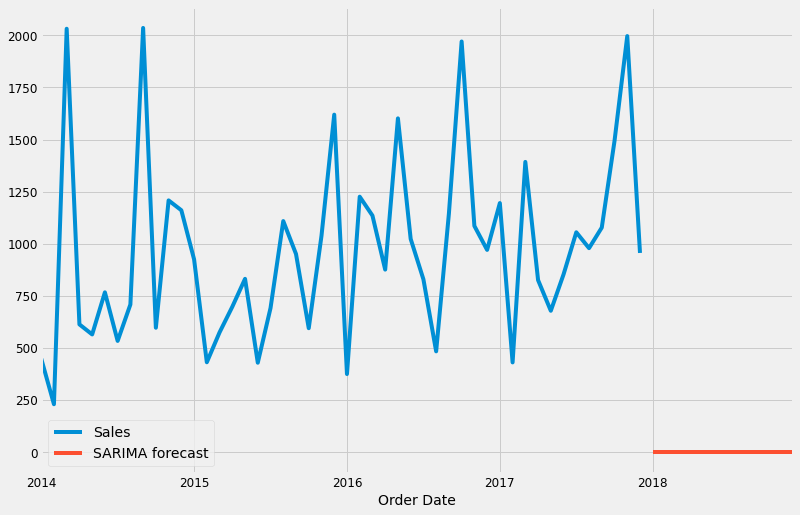

In [192]:
r_technology.plot(legend=True,figsize=(12,8))
forecast_technology.plot(legend=True)

# Comparing the categories

In [193]:
furniture1 = pd.DataFrame({'Order Date': r_furniture.index , 'Sales':r_furniture.values})
furniture1

,Order Date,Sales
0,2014-01-01,480.194231
1,2014-02-01,367.931600
2,2014-03-01,857.291529
3,2014-04-01,567.488357
4,2014-05-01,432.049188
5,2014-06-01,695.059242
6,2014-07-01,601.169500
7,2014-08-01,457.521656
8,2014-09-01,992.353367
9,2014-10-01,769.015437


In [194]:
office1 = pd.DataFrame({'Order Date': r_office.index , 'Sales':r_office.values})
office1

,Order Date,Sales
0,2014-01-01,285.357647
1,2014-02-01,63.042588
2,2014-03-01,391.176318
3,2014-04-01,464.794750
4,2014-05-01,324.346545
5,2014-06-01,588.774409
6,2014-07-01,756.060400
7,2014-08-01,541.879143
8,2014-09-01,1015.677704
9,2014-10-01,267.078815


In [195]:
technology1 = pd.DataFrame({'Order Date': r_technology.index , 'Sales':r_technology.values})
technology1

,Order Date,Sales
0,2014-01-01,449.041429
1,2014-02-01,229.787143
2,2014-03-01,2031.948375
3,2014-04-01,613.028933
4,2014-05-01,564.698588
5,2014-06-01,766.905909
6,2014-07-01,533.608933
7,2014-08-01,708.435385
8,2014-09-01,2035.838133
9,2014-10-01,596.900900


# Data Exploration

In [196]:
store_office_furniture = furniture1.merge(office1, how='inner', on='Order Date')
store_office_furniture

,Order Date,Sales_x,Sales_y
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545
5,2014-06-01,695.059242,588.774409
6,2014-07-01,601.169500,756.060400
7,2014-08-01,457.521656,541.879143
8,2014-09-01,992.353367,1015.677704
9,2014-10-01,769.015437,267.078815


In [197]:
store_office_technology = technology1.merge(office1, how='inner', on='Order Date')
store_office_technology

,Order Date,Sales_x,Sales_y
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545
5,2014-06-01,766.905909,588.774409
6,2014-07-01,533.608933,756.060400
7,2014-08-01,708.435385,541.879143
8,2014-09-01,2035.838133,1015.677704
9,2014-10-01,596.900900,267.078815


In [198]:
store_technology_furniture = furniture1.merge(technology1, how='inner', on='Order Date')
store_technology_furniture

,Order Date,Sales_x,Sales_y
0,2014-01-01,480.194231,449.041429
1,2014-02-01,367.931600,229.787143
2,2014-03-01,857.291529,2031.948375
3,2014-04-01,567.488357,613.028933
4,2014-05-01,432.049188,564.698588
5,2014-06-01,695.059242,766.905909
6,2014-07-01,601.169500,533.608933
7,2014-08-01,457.521656,708.435385
8,2014-09-01,992.353367,2035.838133
9,2014-10-01,769.015437,596.900900


In [199]:
store_office_furniture.rename(columns={'Sales_x':'furniture_sales','Sales_y':'office_sales'},inplace=True)
store_office_furniture

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545
5,2014-06-01,695.059242,588.774409
6,2014-07-01,601.169500,756.060400
7,2014-08-01,457.521656,541.879143
8,2014-09-01,992.353367,1015.677704
9,2014-10-01,769.015437,267.078815


In [200]:
store_office_technology.rename(columns={'Sales_x':'technology_sales','Sales_y':'office_sales'},inplace=True)
store_office_technology

,Order Date,technology_sales,office_sales
0,2014-01-01,449.041429,285.357647
1,2014-02-01,229.787143,63.042588
2,2014-03-01,2031.948375,391.176318
3,2014-04-01,613.028933,464.794750
4,2014-05-01,564.698588,324.346545
5,2014-06-01,766.905909,588.774409
6,2014-07-01,533.608933,756.060400
7,2014-08-01,708.435385,541.879143
8,2014-09-01,2035.838133,1015.677704
9,2014-10-01,596.900900,267.078815


In [201]:
store_technology_furniture.rename(columns={'Sales_x':'furniture_sales','Sales_y':'technology_sales'},inplace=True)
store_technology_furniture

,Order Date,furniture_sales,technology_sales
0,2014-01-01,480.194231,449.041429
1,2014-02-01,367.931600,229.787143
2,2014-03-01,857.291529,2031.948375
3,2014-04-01,567.488357,613.028933
4,2014-05-01,432.049188,564.698588
5,2014-06-01,695.059242,766.905909
6,2014-07-01,601.169500,533.608933
7,2014-08-01,457.521656,708.435385
8,2014-09-01,992.353367,2035.838133
9,2014-10-01,769.015437,596.900900


In [202]:
store_office_furniture_technology = technology1.merge(store_office_furniture, how='inner', on='Order Date')
store_office_furniture_technology

,Order Date,Sales,furniture_sales,office_sales
0,2014-01-01,449.041429,480.194231,285.357647
1,2014-02-01,229.787143,367.931600,63.042588
2,2014-03-01,2031.948375,857.291529,391.176318
3,2014-04-01,613.028933,567.488357,464.794750
4,2014-05-01,564.698588,432.049188,324.346545
5,2014-06-01,766.905909,695.059242,588.774409
6,2014-07-01,533.608933,601.169500,756.060400
7,2014-08-01,708.435385,457.521656,541.879143
8,2014-09-01,2035.838133,992.353367,1015.677704
9,2014-10-01,596.900900,769.015437,267.078815


In [203]:
store_office_furniture_technology.rename(columns={'Sales':'technology_sales','Sales_x':'furniture_sales','Sales_y':'office_sales'},inplace=True)
store_office_furniture_technology

,Order Date,technology_sales,furniture_sales,office_sales
0,2014-01-01,449.041429,480.194231,285.357647
1,2014-02-01,229.787143,367.931600,63.042588
2,2014-03-01,2031.948375,857.291529,391.176318
3,2014-04-01,613.028933,567.488357,464.794750
4,2014-05-01,564.698588,432.049188,324.346545
5,2014-06-01,766.905909,695.059242,588.774409
6,2014-07-01,533.608933,601.169500,756.060400
7,2014-08-01,708.435385,457.521656,541.879143
8,2014-09-01,2035.838133,992.353367,1015.677704
9,2014-10-01,596.900900,769.015437,267.078815


### Plotting 

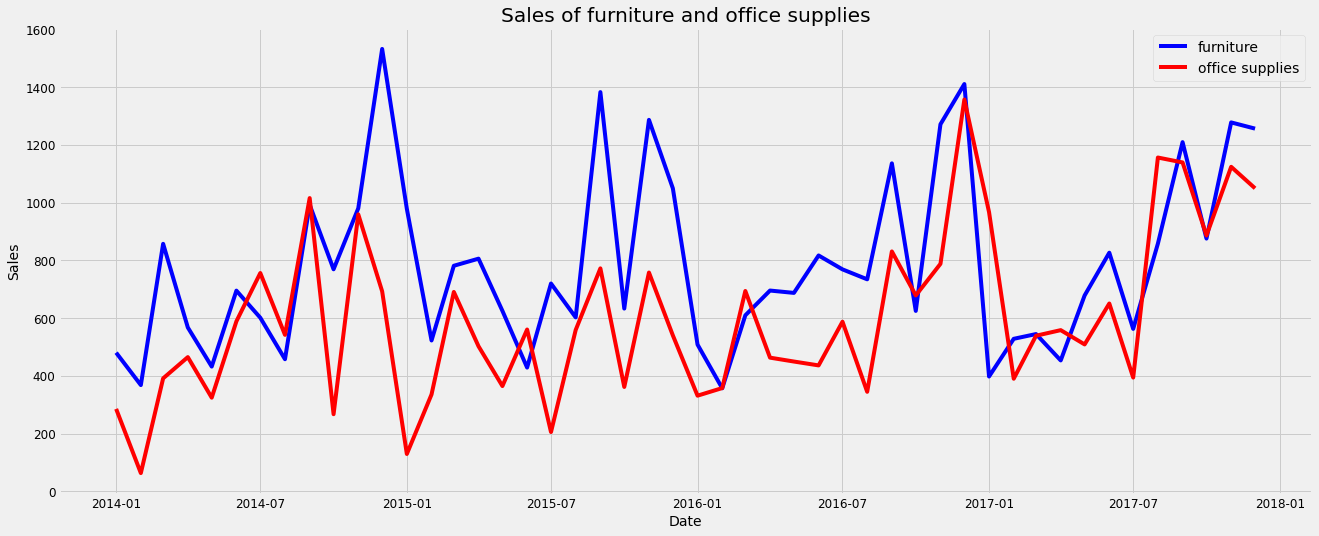

In [204]:
plt.figure(figsize=(20,8))
plt.plot(store_office_furniture['Order Date'],store_office_furniture['furniture_sales'],'b-',label='furniture')
plt.plot(store_office_furniture['Order Date'],store_office_furniture['office_sales'],'r-',label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and office supplies')
plt.legend()

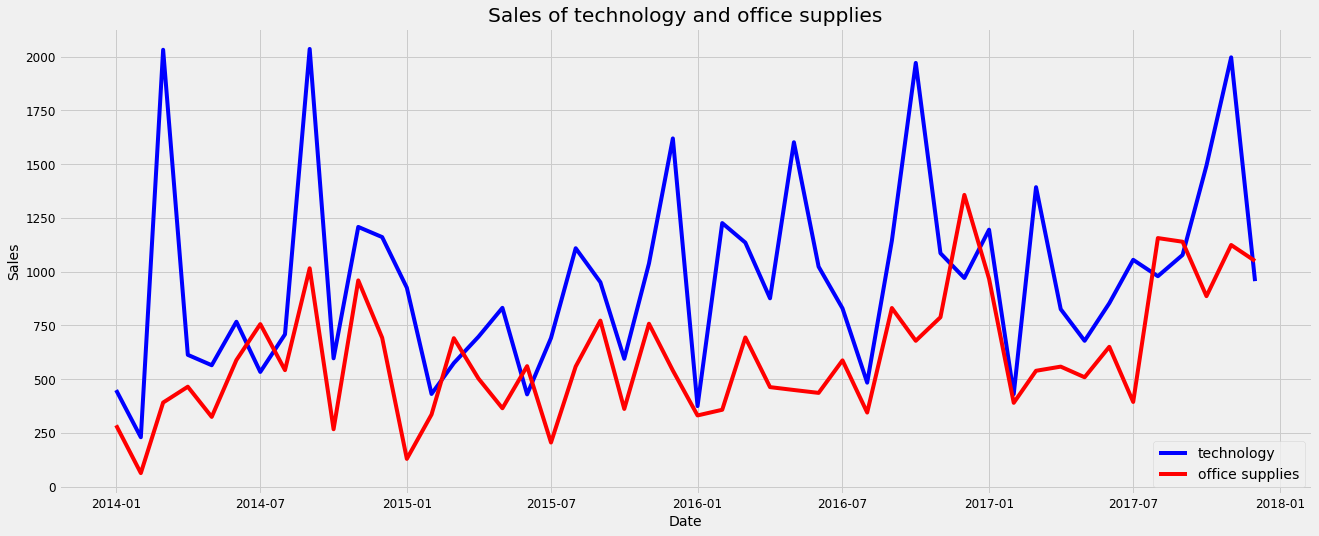

In [205]:
plt.figure(figsize=(20,8))
plt.plot(store_office_technology['Order Date'],store_office_technology['technology_sales'],'b-',label='technology')
plt.plot(store_office_technology['Order Date'],store_office_technology['office_sales'],'r-',label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of technology and office supplies')
plt.legend()

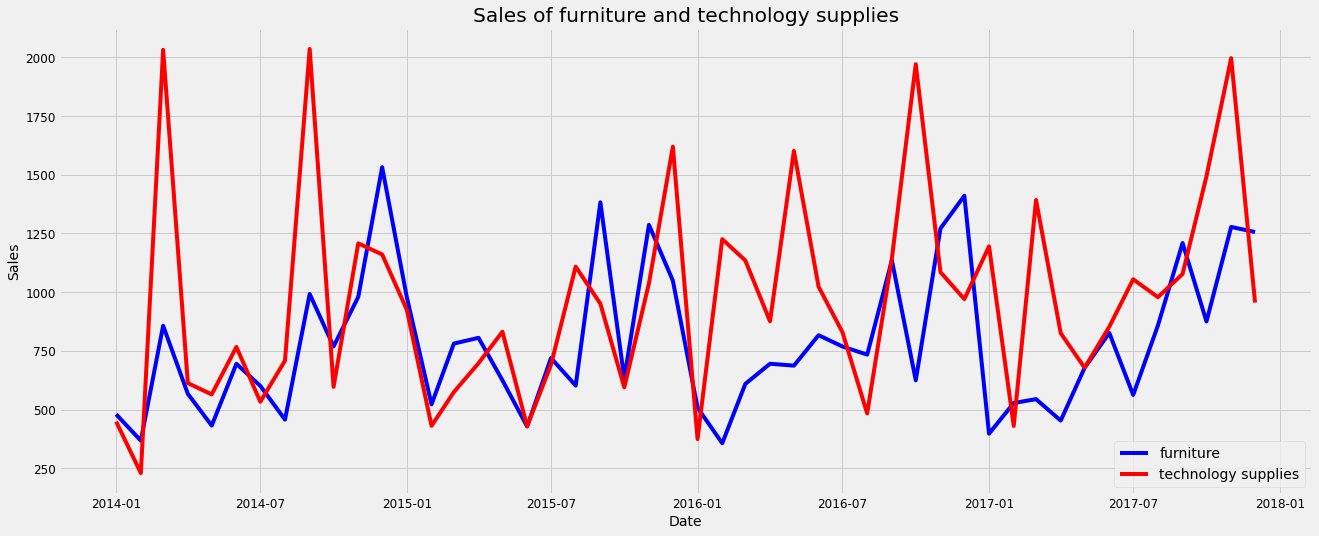

In [206]:
plt.figure(figsize=(20,8))
plt.plot(store_technology_furniture['Order Date'],store_technology_furniture['furniture_sales'],'b-',label='furniture')
plt.plot(store_technology_furniture['Order Date'],store_technology_furniture['technology_sales'],'r-',label='technology supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture and technology supplies')
plt.legend()

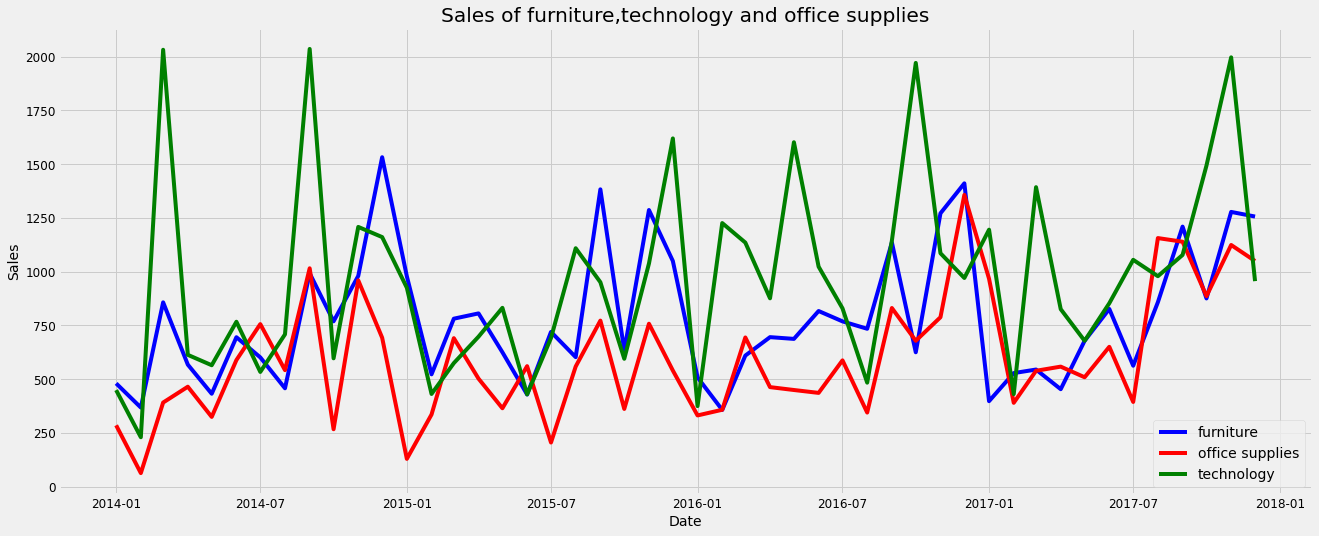

In [207]:
plt.figure(figsize=(20,8))
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['furniture_sales'],'b-',label='furniture')
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['office_sales'],'r-',label='office supplies')
plt.plot(store_office_furniture_technology['Order Date'],store_office_furniture_technology['technology_sales'],'g-',label='technology')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of furniture,technology and office supplies')
plt.legend()

# Time Series modelling with prophet

In [ ]:
pip install prophet

In [276]:
from prophet import Prophet
import matplotlib.pyplot as plt

### Furniture 

In [219]:
r_furniture_df = r_furniture.to_frame()

In [220]:
r_furniture_df['ds'] = r_furniture_df.index

In [221]:
r_furniture_df.columns = ['y','ds']

In [222]:
r_furniture_df

,y,ds
Order Date,,
2014-01-01,480.194231,2014-01-01
2014-02-01,367.931600,2014-02-01
2014-03-01,857.291529,2014-03-01
2014-04-01,567.488357,2014-04-01
2014-05-01,432.049188,2014-05-01
2014-06-01,695.059242,2014-06-01
2014-07-01,601.169500,2014-07-01
2014-08-01,457.521656,2014-08-01
2014-09-01,992.353367,2014-09-01


In [223]:
r_furniture_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       48 non-null     float64       
 1   ds      48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [225]:
m_furniture = Prophet()

In [226]:
m_furniture.fit(r_furniture_df)

16:51:08 - cmdstanpy - INFO - Chain [1] start processing
16:51:10 - cmdstanpy - INFO - Chain [1] done processing


In [227]:
future_furniture = m_furniture.make_future_dataframe(periods=24,freq='MS')

In [228]:
future_furniture

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
...,...
67,2019-08-01
68,2019-09-01
69,2019-10-01
70,2019-11-01


In [229]:
forecast_furniture = m_furniture.predict(future_furniture)

In [230]:
forecast_furniture

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,726.058109,371.323638,700.344208,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,-190.686099,-190.686099,0.0,0.0,0.0,535.372010
1,2014-02-01,727.494421,294.646787,615.844956,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,-276.379157,-276.379157,0.0,0.0,0.0,451.115264
2,2014-03-01,728.791734,558.283105,850.470980,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,-22.388253,-22.388253,0.0,0.0,0.0,706.403481
3,2014-04-01,730.228046,478.037484,786.179578,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,-100.140909,-100.140909,0.0,0.0,0.0,630.087137
4,2014-05-01,731.618025,417.793498,728.998611,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,-160.818882,-160.818882,0.0,0.0,0.0,570.799142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019-08-01,820.483987,504.830232,820.400634,820.483963,820.484010,-152.741668,-152.741668,-152.741668,-152.741668,-152.741668,-152.741668,0.0,0.0,0.0,667.742319
68,2019-09-01,821.920298,1207.224159,1538.667082,821.920272,821.920323,551.714450,551.714450,551.714450,551.714450,551.714450,551.714450,0.0,0.0,0.0,1373.634748
69,2019-10-01,823.310277,657.363268,957.160669,823.310249,823.310303,-13.792342,-13.792342,-13.792342,-13.792342,-13.792342,-13.792342,0.0,0.0,0.0,809.517935
70,2019-11-01,824.746588,1076.219570,1396.640799,824.746558,824.746616,413.144519,413.144519,413.144519,413.144519,413.144519,413.144519,0.0,0.0,0.0,1237.891107


In [231]:
forecast_furniture.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [232]:
forecast_furniture[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
60,2019-01-01,522.337306,839.706587,680.605875
61,2019-02-01,315.446300,635.539395,471.017210
62,2019-03-01,701.623858,1012.684770,860.017310
63,2019-04-01,599.324780,921.213120,761.303064
64,2019-05-01,472.054409,783.295165,631.586855
65,2019-06-01,454.768645,777.017669,609.810663
66,2019-07-01,621.642798,927.113221,770.754006
67,2019-08-01,504.830232,820.400634,667.742319
68,2019-09-01,1207.224159,1538.667082,1373.634748
69,2019-10-01,657.363268,957.160669,809.517935


Text(19.6, 0.5, 'Sales')

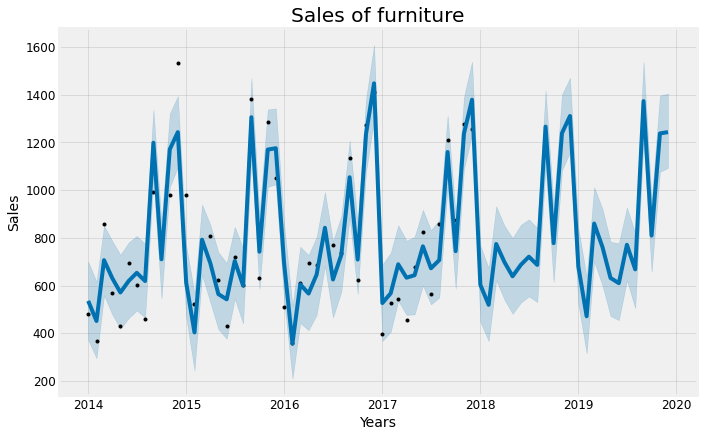

In [233]:
m_furniture.plot(forecast_furniture);
plt.title('Sales of furniture')
plt.xlabel('Years')
plt.ylabel('Sales')

In [234]:
from prophet.plot import plot_plotly, plot_components_plotly

In [283]:
plot_plotly(m_furniture, forecast_furniture)

<AxesSubplot:xlabel='ds'>

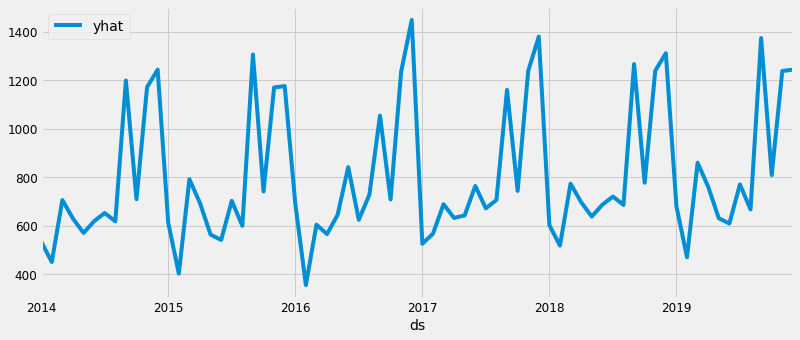

In [279]:
forecast_furniture.plot(x='ds',y='yhat',figsize=(12,5))

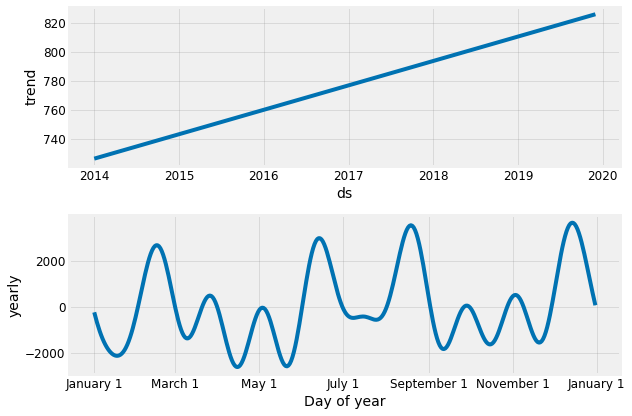

In [280]:
m_furniture.plot_components(forecast_furniture);

In [ ]:
plot_components_plotly(m_furniture , forecast_furniture)

### Office 

In [241]:
r_office_df = r_office.to_frame()

In [242]:
r_office_df['ds'] = r_office_df.index

In [243]:
r_office_df.columns = ['y','ds']

In [244]:
r_office_df

,y,ds
Order Date,,
2014-01-01,285.357647,2014-01-01
2014-02-01,63.042588,2014-02-01
2014-03-01,391.176318,2014-03-01
2014-04-01,464.794750,2014-04-01
2014-05-01,324.346545,2014-05-01
2014-06-01,588.774409,2014-06-01
2014-07-01,756.060400,2014-07-01
2014-08-01,541.879143,2014-08-01
2014-09-01,1015.677704,2014-09-01


In [245]:
r_office_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       48 non-null     float64       
 1   ds      48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [246]:
m_office = Prophet()

In [247]:
m_office.fit(r_office_df)

17:14:59 - cmdstanpy - INFO - Chain [1] start processing
17:14:59 - cmdstanpy - INFO - Chain [1] done processing


In [248]:
future_office = m_office.make_future_dataframe(periods=24,freq='MS')

In [249]:
future_office

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
...,...
67,2019-08-01
68,2019-09-01
69,2019-10-01
70,2019-11-01


In [250]:
forecast_office = m_office.predict(future_office)

In [251]:
forecast_office

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,487.530485,156.636570,541.929072,487.530485,487.530485,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,494.918166,-94.917435,288.478096,494.918166,494.918166,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,501.590911,266.602246,674.126488,501.590911,501.590911,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,508.978592,171.891595,583.447222,508.978592,508.978592,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,516.127962,70.004191,440.136712,516.127962,516.127962,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019-08-01,973.645992,806.151417,1219.899274,973.618626,973.673492,43.876398,43.876398,43.876398,43.876398,43.876398,43.876398,0.0,0.0,0.0,1017.522390
68,2019-09-01,981.044374,1122.797007,1504.832925,981.014592,981.074860,338.281218,338.281218,338.281218,338.281218,338.281218,338.281218,0.0,0.0,0.0,1319.325593
69,2019-10-01,988.204100,608.960431,1004.536453,988.172172,988.236523,-188.232775,-188.232775,-188.232775,-188.232775,-188.232775,-188.232775,0.0,0.0,0.0,799.971325
70,2019-11-01,995.602482,1194.657272,1595.835504,995.568376,995.636953,400.624542,400.624542,400.624542,400.624542,400.624542,400.624542,0.0,0.0,0.0,1396.227025


In [252]:
forecast_office.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [253]:
forecast_office[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
60,2019-01-01,489.958040,863.689807,680.666091
61,2019-02-01,443.100630,838.088748,635.972545
62,2019-03-01,742.261931,1143.556181,946.733789
63,2019-04-01,634.906610,1009.659342,822.148206
64,2019-05-01,438.547969,836.841619,628.938058
65,2019-06-01,707.135451,1077.314084,884.345147
66,2019-07-01,471.428600,873.345684,677.209512
67,2019-08-01,806.151417,1219.899274,1017.522390
68,2019-09-01,1122.797007,1504.832925,1319.325593
69,2019-10-01,608.960431,1004.536453,799.971325


Text(19.6, 0.5, 'Sales')

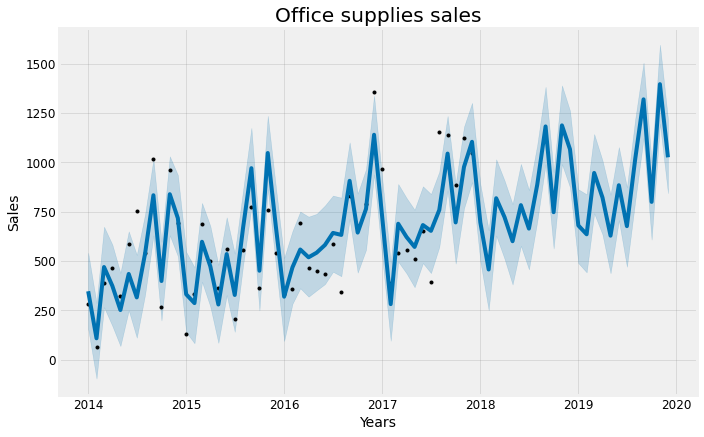

In [254]:
m_office.plot(forecast_office);
plt.title('Office supplies sales')
plt.xlabel('Years')
plt.ylabel('Sales')

In [ ]:
plot_plotly(m_office, forecast_office)

<AxesSubplot:xlabel='ds'>

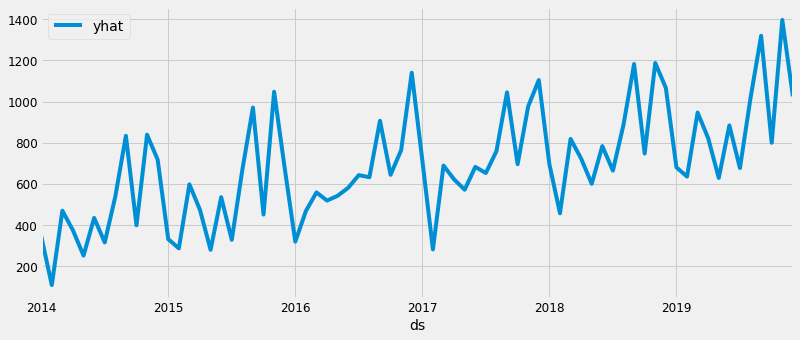

In [257]:
forecast_office.plot(x='ds',y='yhat',figsize=(12,5))

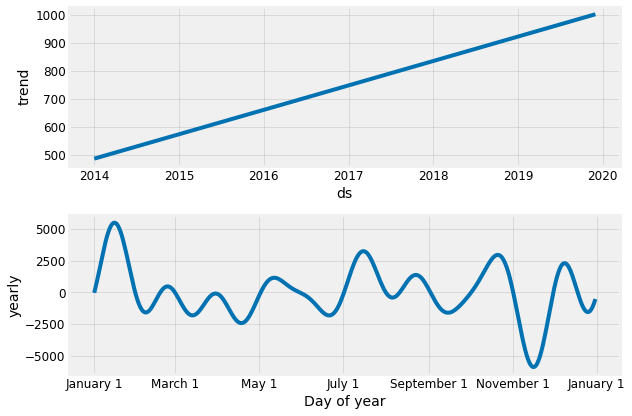

In [258]:
m_office.plot_components(forecast_office);

In [ ]:
plot_components_plotly(m_office , forecast_office)

### Technology 

In [260]:
r_technology_df = r_technology.to_frame()
r_technology_df['ds'] = r_technology_df.index
r_technology_df.columns = ['y','ds']
r_technology_df

,y,ds
Order Date,,
2014-01-01,449.041429,2014-01-01
2014-02-01,229.787143,2014-02-01
2014-03-01,2031.948375,2014-03-01
2014-04-01,613.028933,2014-04-01
2014-05-01,564.698588,2014-05-01
2014-06-01,766.905909,2014-06-01
2014-07-01,533.608933,2014-07-01
2014-08-01,708.435385,2014-08-01
2014-09-01,2035.838133,2014-09-01


In [261]:
r_technology_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-01-01 to 2017-12-01
Freq: MS
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   y       48 non-null     float64       
 1   ds      48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [262]:
m_technology = Prophet()
m_technology.fit(r_technology_df)

17:15:53 - cmdstanpy - INFO - Chain [1] start processing
17:15:53 - cmdstanpy - INFO - Chain [1] done processing


In [263]:
future_technology = m_technology.make_future_dataframe(periods=24,freq='MS')
future_technology

,ds
0,2014-01-01
1,2014-02-01
2,2014-03-01
3,2014-04-01
4,2014-05-01
...,...
67,2019-08-01
68,2019-09-01
69,2019-10-01
70,2019-11-01


In [264]:
forecast_technology = m_technology.predict(future_technology)
forecast_technology

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,952.354900,375.814212,1109.958028,952.354900,952.354900,-220.563518,-220.563518,-220.563518,-220.563518,-220.563518,-220.563518,0.0,0.0,0.0,731.791382
1,2014-02-01,958.476047,-4.175212,698.542605,958.476047,958.476047,-613.862382,-613.862382,-613.862382,-613.862382,-613.862382,-613.862382,0.0,0.0,0.0,344.613664
2,2014-03-01,964.004826,794.955714,1489.840288,964.004826,964.004826,181.796373,181.796373,181.796373,181.796373,181.796373,181.796373,0.0,0.0,0.0,1145.801199
3,2014-04-01,970.125973,261.281665,1008.218199,970.125973,970.125973,-328.518998,-328.518998,-328.518998,-328.518998,-328.518998,-328.518998,0.0,0.0,0.0,641.606975
4,2014-05-01,976.049665,397.517629,1114.501961,976.049665,976.049665,-237.337621,-237.337621,-237.337621,-237.337621,-237.337621,-237.337621,0.0,0.0,0.0,738.712044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019-08-01,1354.771136,1142.850694,1853.734790,1354.771087,1354.771184,135.985179,135.985179,135.985179,135.985179,135.985179,135.985179,0.0,0.0,0.0,1490.756315
68,2019-09-01,1360.892286,1436.439395,2130.008344,1360.892234,1360.892339,399.279074,399.279074,399.279074,399.279074,399.279074,399.279074,0.0,0.0,0.0,1760.171360
69,2019-10-01,1366.815980,429.283425,1141.716205,1366.815925,1366.816036,-585.315817,-585.315817,-585.315817,-585.315817,-585.315817,-585.315817,0.0,0.0,0.0,781.500163
70,2019-11-01,1372.937131,1165.617750,1883.693963,1372.937072,1372.937191,150.386727,150.386727,150.386727,150.386727,150.386727,150.386727,0.0,0.0,0.0,1523.323857


In [265]:
forecast_technology.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [266]:
forecast_technology[['ds','yhat_lower', 'yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
60,2019-01-01,524.710905,1256.861195,883.358664
61,2019-02-01,605.074831,1301.569162,955.919737
62,2019-03-01,1091.103472,1780.008817,1438.844567
63,2019-04-01,662.502145,1349.021453,991.802707
64,2019-05-01,598.531648,1344.106872,955.702668
65,2019-06-01,580.604519,1291.627241,924.215829
66,2019-07-01,705.343322,1489.300102,1083.808482
67,2019-08-01,1142.850694,1853.734790,1490.756315
68,2019-09-01,1436.439395,2130.008344,1760.171360
69,2019-10-01,429.283425,1141.716205,781.500163


Text(19.6, 0.5, 'Sales')

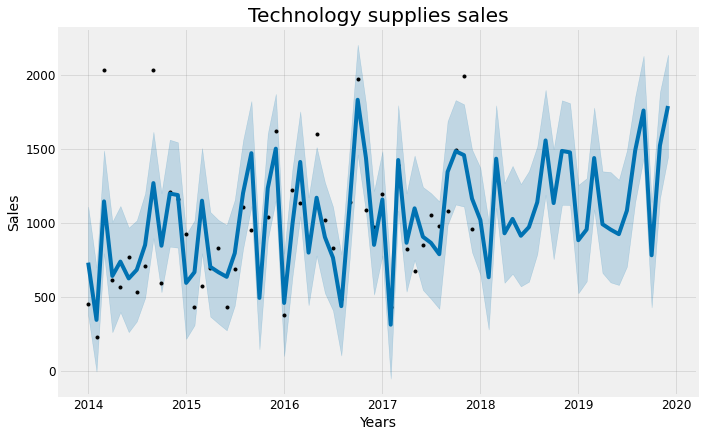

In [267]:
m_technology.plot(forecast_technology);
plt.title('Technology supplies sales')
plt.xlabel('Years')
plt.ylabel('Sales')

<AxesSubplot:xlabel='ds'>

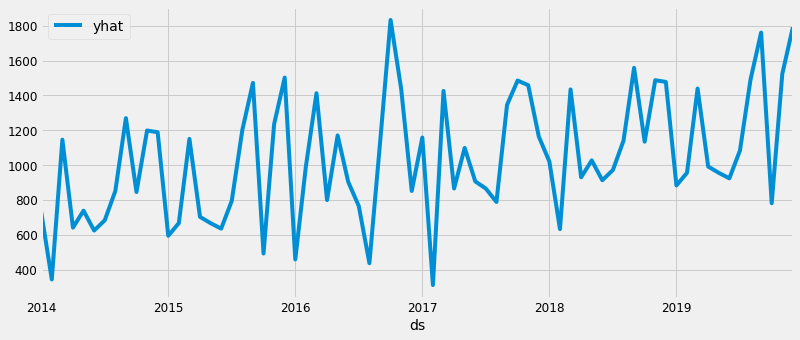

In [269]:
forecast_technology.plot(x='ds',y='yhat',figsize=(12,5))

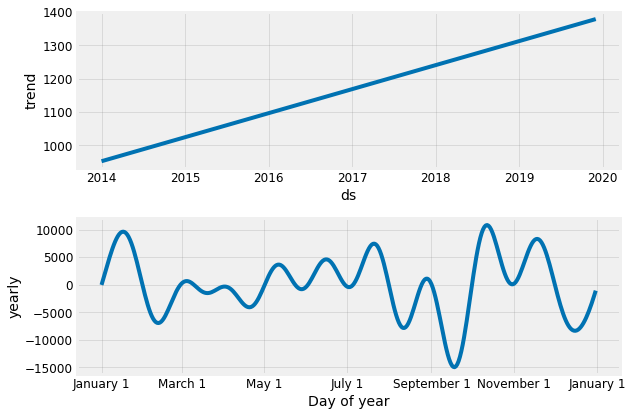

In [270]:
m_technology.plot_components(forecast_technology);